(1344, 1344)
There are  72 objects in image cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148_posx.
There are  73 objects in image cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148_negx.
There are  34 objects in image cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148_posy.
There are  36 objects in image cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148_negy.
There are  15 objects in image cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148_posz.
There are 115 objects in image cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148_negz.


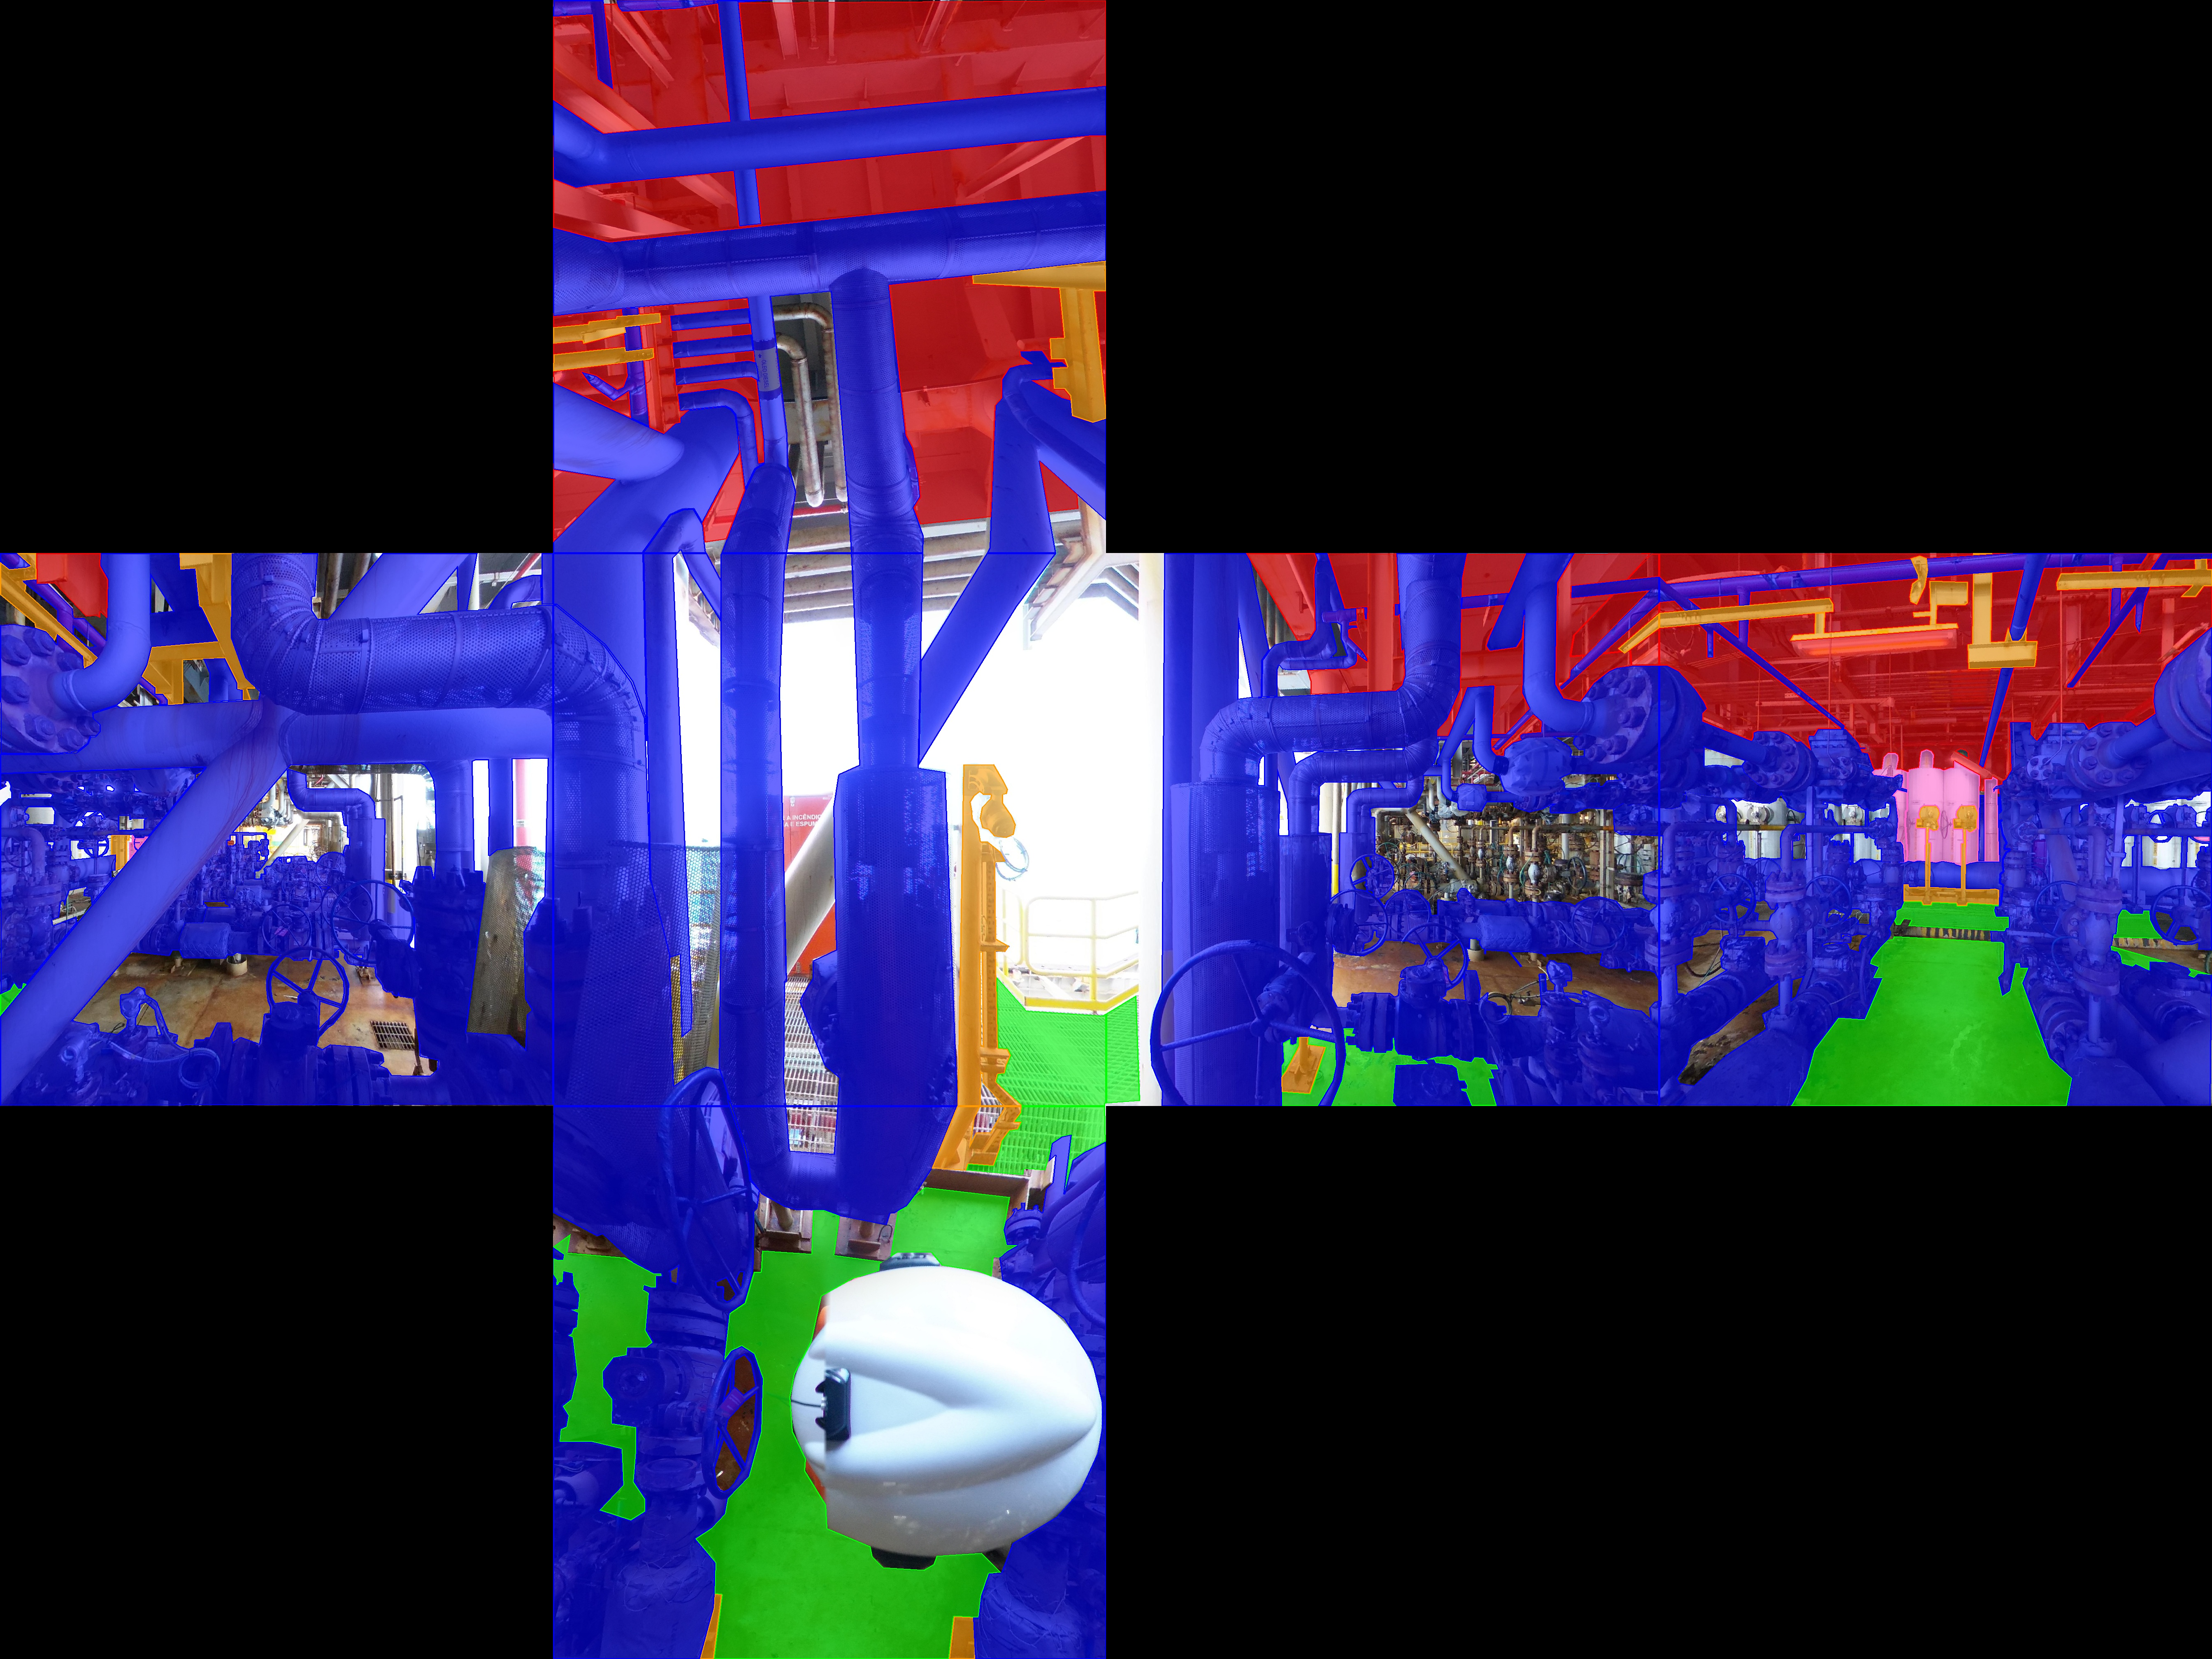

In [5]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import IPython

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret,width=1000,height=1000)
    IPython.display.display(i)

# Load your RGB image
#label_path = 'datasets/darwin_export_test/labels/test/cubemap_P74_d31875d361c6cbcfbce07cf0ad147d8b_posy.txt'
#img_name = 'datasets/darwin_export_test/images/test/cubemap_P74_d31875d361c6cbcfbce07cf0ad147d8b_posy.png'
img_name = 'cubemap_P74_3880dbc19bdd9362d4d3e80b2a008148'
img_name_posx = img_name+'_posx'
img_name_negx = img_name+'_negx'
img_name_posy = img_name+'_posy'
img_name_negy = img_name+'_negy'
img_name_posz = img_name+'_posz'
img_name_negz = img_name+'_negz'
face_path_list = [img_name_posx,img_name_negx,img_name_posy,img_name_negy,img_name_posz,img_name_negz]


image = Image.open(f"SISTEMAS_UFF/Images/{img_name_posx}.png")
width,height = image.size

complete_image = np.zeros((height*3,width*4,4))

image = image.convert("RGBA")

# Create a new image with an alpha channel
image_with_alpha = Image.new("RGBA", image.size)

# Create a drawing context for the image with an alpha channel
draw = ImageDraw.Draw(image_with_alpha)

if img_name.endswith("posx"):
    pass
elif img_name.endswith("negx"):
    pass
elif img_name.endswith("negy"):
    image = image.rotate(270)
    pass
elif img_name.endswith("posy"):
    image = image.rotate(90)
    pass
elif img_name.endswith("posz"):
    pass
elif img_name.endswith("negz"):
    pass

alpha_value = 150
outline_width = 3

color_list =    [
                (255, 102, 204, alpha_value), # Piso
                (0, 51, 0, alpha_value), # Suportes
                (102, 51, 0, alpha_value), # TVF
                (102, 0, 102, alpha_value), # Teto
                (255, 153, 0, alpha_value), # Guardacorpo
                (0, 0, 255, alpha_value),# Estruturas
                (0, 255, 0, alpha_value),# Escadas
                (250, 0, 0, alpha_value),# Equipamanto
                (0, 0, 0, 0), # Hole
            ] 

outline_list =    [
                (255, 102, 204, 255), # Piso
                (0, 51, 0, 255), # Suportes
                (102, 51, 0, 255), # TVF
                (102, 0, 102, 255), # Teto
                (255, 153, 0, 255), # Guardacorpo
                (0, 0, 255, 255), # Estruturas
                (0, 255, 0, 255), # Escadas
                (250, 0, 0, 255), # Equipamanto
                (0, 0, 0, 0),  #hole
            ] 

print(image.size)
for face_name in face_path_list:
    
    image = Image.open(f"SISTEMAS_UFF/Images/{face_name}.png")
    image = image.convert("RGBA")

    # Create a new image with an alpha channel
    image_with_alpha = Image.new("RGBA", image.size)

    # Create a drawing context for the image with an alpha channel
    draw = ImageDraw.Draw(image_with_alpha)

    if face_name.endswith("PosX"):
        pass
    elif face_name.endswith("NegX"):
        pass
    elif face_name.endswith("negy"):
        image = image.rotate(270)
        pass
    elif face_name.endswith("posy"):
        image = image.rotate(90)
        pass
    elif face_name.endswith("PosZ"):
        pass
    elif face_name.endswith("NegZ"):
        pass

    with open(f"SISTEMAS_UFF/export-v3//output/{face_name}.txt") as file:
        Lines = file.readlines()
        
        # Strips the newline character
        print(f"There are {len(Lines):3d} objects in image {face_name}.")
        color = 0
        draw_later_holes = []
        for line in Lines:
            classe = int(line.strip().split()[0])
            polygons = line.strip().split()[1:]
            polygon_point_count = len(polygons)
            polygon_point_list = []
            #print(polygon_point_count)
            for i in range(int(polygon_point_count/2)):
                x = float(polygons[(i*2)])*image.size[0]
                y = float(polygons[(i*2)+1])*image.size[1]
                #print(f"[x = {x},",end = "")
                #print(f"y = {y}]", end = ",")
                
                polygon_point_list.append((x,y))
                    
            if len(polygon_point_list) > 0:
                if classe <8:
                    #print(f"classe = {classe}")
                    fill_color = color_list[classe]
                    outline_color = outline_list[classe]
                    #print(f"polygon_point_list = {polygon_point_list}")

                    draw.polygon(polygon_point_list, fill=(fill_color), outline=(outline_color), width=outline_width)
                else:
                    draw_later_holes.append((classe,polygon_point_list))
            else:
                #print(mask)
                continue
        #draw holes
        if len(draw_later_holes)> 0:
            for hole in draw_later_holes:
                classe, draw_later_holes = hole
                
                fill_color = color_list[-1]
                outline_color = outline_list[classe-8]
                #print(f"polygon_point_list = {draw_later_holes}")

                draw.polygon(draw_later_holes, fill=(fill_color), outline=(outline_color), width=outline_width)
            
        annotated_face = Image.alpha_composite(image, image_with_alpha)
        img = np.array(annotated_face) 
        
        height_pos = 0
        width_pos = 0
        if face_name.endswith("posx"):
            height_pos = 1
            width_pos = 2
            pass
        elif face_name.endswith("negx"):
            height_pos = 1
            width_pos = 0
            pass
        elif face_name.endswith("negy"):
            height_pos = 0
            width_pos = 1
            pass
        elif face_name.endswith("posy"):
            height_pos = 2
            width_pos = 1
            pass
        elif face_name.endswith("posz"):
            height_pos = 1
            width_pos = 1
            pass
        elif face_name.endswith("negz"):
            height_pos = 1
            width_pos = 3
            pass
        complete_image[height*height_pos:height*(height_pos+1),width*width_pos:width*(width_pos+1),:] = img
complete_image[..., :3] = complete_image[..., 2::-1]
imshow(complete_image)
#plt.imshow(img,cmap='gray')
#plt.show()